<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/practice6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from tensorflow.keras.datasets import mnist # data 불러오기(손 글씨 숫자 데이터넷)

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
#data 잘 불러왔는지 확인

3


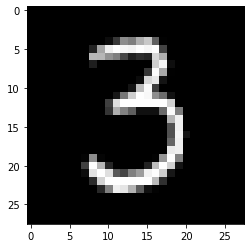

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline 
#셀 안에 그림 그리는 조건

index= 50 #index설정에 따라 원하는 data를 골라서 그릴 수 있다.
img = x_train[index]
print(y_train[index])
plt.imshow(img, cmap='gray')

In [44]:
#1) 형변환 (astype)

In [45]:
x_train = x_train.astype('float32') #32bit 실수형 / np.ndarray.astype은 numpy에 검색하면 형 변환 해주는 함수
x_test = x_test.astype('float32')

In [46]:
#2) normalize
x_train /= 255
x_test /= 255
#flatten 전
x_train.shape

(60000, 28, 28)

In [47]:
#3)flatten
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [48]:
x_train.shape

(60000, 784)

In [49]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [50]:
#4) one-hot encoding

#아직하지 않기.

## **4.모델만들기**

1> 첫 번째 layer는 input_dim(feature 개수)을 설정해야 한다.

2> 마지막 layer는 우리가 진행하는 일이 regression, binary, multiclass이냐에 따라 다르게 설정한다.

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense


In [52]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation='relu')) #input_dim 대신에 input_shape사용가능
model.add(Dense(17, 'relu'))
model.add(Dense(units= 10, activation='softmax')) #마지막 layer는 multiclass여서 activation을 softmax

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 17)                1105      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                180       
Total params: 51,525
Trainable params: 51,525
Non-trainable params: 0
_________________________________________________________________


5.모델의 학습과정 설정

In [54]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

6.모델학습

In [55]:
#fit

In [56]:
history = model.fit(x_train, y_train, validation_split=1/6, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3477 - accuracy: 0.8991 - val_loss: 0.1709 - val_accuracy: 0.9530
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1530 - accuracy: 0.9547 - val_loss: 0.1234 - val_accuracy: 0.9646
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1101 - accuracy: 0.9672 - val_loss: 0.1128 - val_accuracy: 0.9667
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9737 - val_loss: 0.1057 - val_accuracy: 0.9690
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0719 - accuracy: 0.9780 - val_loss: 0.1042 - val_accuracy: 0.9703


In [57]:
#history
#1. model.fit의 return값
#2. train 과정에서 일어나는 현상들을 기록

In [58]:
history.history['loss']

[0.3477494418621063,
 0.15298102796077728,
 0.11005157977342606,
 0.0863887146115303,
 0.07187174260616302]

In [59]:
vars(history) #vars:python내장함수, 해당객체의 모듈,클래스, 인스턴스의 값을 넘긴다.


{'_chief_worker_only': None,
 '_supports_tf_logs': False,
 'epoch': [0, 1, 2, 3, 4],
 'history': {'accuracy': [0.8990799784660339,
   0.9547200202941895,
   0.967199981212616,
   0.9737200140953064,
   0.9780399799346924],
  'loss': [0.3477494418621063,
   0.15298102796077728,
   0.11005157977342606,
   0.0863887146115303,
   0.07187174260616302],
  'val_accuracy': [0.953000009059906,
   0.9646000266075134,
   0.96670001745224,
   0.968999981880188,
   0.970300018787384],
  'val_loss': [0.1709069162607193,
   0.12339001148939133,
   0.1128004789352417,
   0.10571379214525223,
   0.10420991480350494]},
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fbe025d0630>,
 'params': {'epochs': 5, 'steps': 1563, 'verbose': 1},
 'validation_data': None}

In [60]:
class FourCal:
  def __init__(self, first, second):
    self.first = first
    self.second = second
  a=1

  def setdata(self, first, second):
    self.first = first
    self.second = second
  def add(self):
    result= self.first + self.second
    return result
  def mul(self):
    result = self.first * self.second
    return result
  def sub(self):
    result = self.first - self.second
    return result
  def div(self):
    result = self.first / self.second
    return result


In [61]:
vars(FourCal)

mappingproxy({'__dict__': <attribute '__dict__' of 'FourCal' objects>,
              '__doc__': None,
              '__init__': <function __main__.FourCal.__init__>,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'FourCal' objects>,
              'a': 1,
              'add': <function __main__.FourCal.add>,
              'div': <function __main__.FourCal.div>,
              'mul': <function __main__.FourCal.mul>,
              'setdata': <function __main__.FourCal.setdata>,
              'sub': <function __main__.FourCal.sub>})

In [62]:
# add메서드의 단점
history = model.fit(x_train, y_train, validation_split=1/6, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0978 - val_accuracy: 0.9724
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.1159 - val_accuracy: 0.9678
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0992 - val_accuracy: 0.9731
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.1046 - val_accuracy: 0.9723
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.1057 - val_accuracy: 0.9737


In [63]:
#fit을 연달아 하면(epoch 5회) >> 이미 5회 학습된 상태에서 5회 추가로 학습하는 것이기 때문에 >> 총 epoch가 10인 상황

In [64]:
#하지만 다른 epoch으로 처음부터 다시하고 싶은데
#1)'del model'을 하고 다시 코드 위부터 실행(귀찮다.)
#2) def 안에 model 만드는 과정을 가둔다.


## 7. 학습과정 graph

In [65]:
#1)loss

In [66]:
#train/val의 loss값을 시각적으로 확인하는 단계

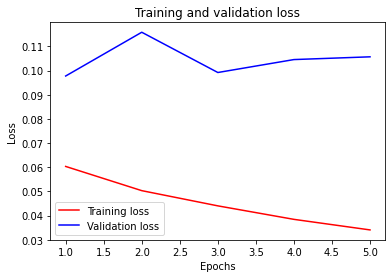

In [67]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1 )

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() #  범례, 동시에 여러개의 그래프를 그릴 때, 그래프마다 라벨을 달고 이 라벨명을 출력하는 기능.

In [68]:
#2)accuracy

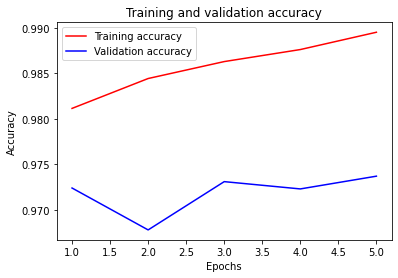

In [69]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

8.최종 Test

1) evaluate 메서드 이용

0) test set으로 마지막 검증하는 과정

In [70]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=0) #return 값은 loss와 accuracy를 가지는 리스트


In [71]:
print('test_loss: '+ str(loss_and_metrics[0]))
print('test_accuracy: ' + str(loss_and_metrics[1]*100) + '%')

test_loss: 0.10016437619924545
test_accuracy: 97.18999862670898%
